# Cuisine Classifier 1

In this lesson, you will use the dataset you saved from the last lesson full of balanced, clean data all about cuisines.

You will use this dataset with a variety of classifiers to predict a given national cuisine based on a group of ingredients. While doing so, you'll learn more about some of the ways that algorithms can be leveraged for classification tasks.

Assuming you completed Lesson 1, make sure that a cleaned_cuisines.csv file exists in the root /data folder for these four lessons.

## Exercise - predict a national cuisine
 Import that file along with the Pandas library:

In [1]:
import pandas as pd
cuisines_df = pd.read_csv("data/cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Now, import several more libraries:

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np

Divide the X and y coordinates into two dataframes for training. cuisine can be the labels dataframe:

In [3]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

Drop that Unnamed: 0 column and the cuisine column, calling drop(). Save the rest of the data as trainable features:

In [4]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Now you are ready to train your model!

## Choosing your classifier
Now that your data is clean and ready for training, you have to decide which algorithm to use for the job.

Scikit-learn groups classification under Supervised Learning, and in that category you will find many ways to classify. The variety is quite bewildering at first sight. The following methods all include classification techniques:

Linear Models
Support Vector Machines
Stochastic Gradient Descent
Nearest Neighbors
Gaussian Processes
Decision Trees
Ensemble methods (voting Classifier)
Multiclass and multioutput algorithms (multiclass and multilabel classification, multiclass-multioutput classification)
You can also use neural networks to classify data, but that is outside the scope of this lesson.

## What classifier to go with?
So, which classifier should you choose? Often, running through several and looking for a good result is a way to test. Scikit-learn offers a side-by-side comparison on a created dataset, comparing KNeighbors, SVC two ways, GaussianProcessClassifier, DecisionTreeClassifier, RandomForestClassifier, MLPClassifier, AdaBoostClassifier, GaussianNB and QuadraticDiscrinationAnalysis, showing the results visualized:

A better way than wildly guessing, however, is to follow the ideas on this downloadable ML Cheat sheet. Here, we discover that, for our multiclass problem, we have some choices:

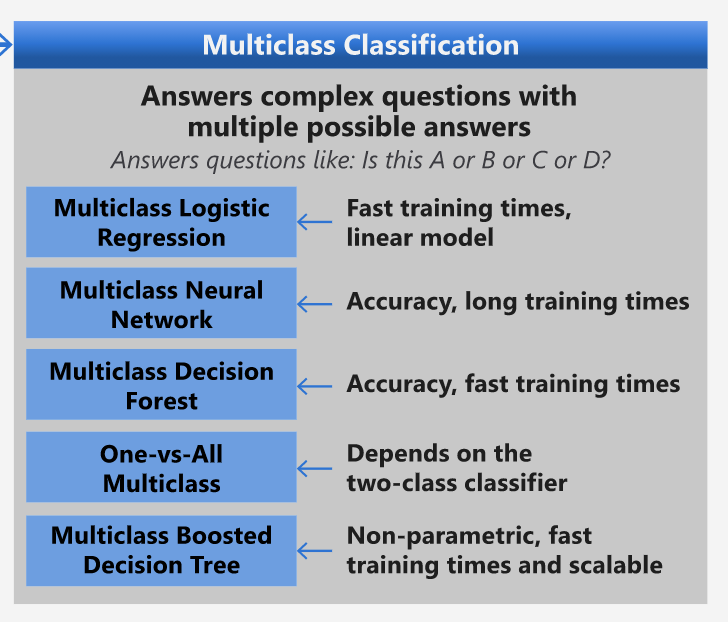

### Reasoning
Let's see if we can reason our way through different approaches given the constraints we have:

Neural networks are too heavy. Given our clean, but minimal dataset, and the fact that we are running training locally via notebooks, neural networks are too heavyweight for this task.
No two-class classifier. We do not use a two-class classifier, so that rules out one-vs-all.
Decision tree or logistic regression could work. A decision tree might work, or logistic regression for multiclass data.
Multiclass Boosted Decision Trees solve a different problem. The multiclass boosted decision tree is most suitable for nonparametric tasks, e.g. tasks designed to build rankings, so it is not useful for us.

### Using Scikit-learn
We will be using Scikit-learn to analyze our data. However, there are many ways to use logistic regression in Scikit-learn. Take a look at the parameters to pass.

Essentially there are two important parameters - multi_class and solver - that we need to specify, when we ask Scikit-learn to perform a logistic regression. The multi_class value applies a certain behavior. The value of the solver is what algorithm to use. Not all solvers can be paired with all multi_class values.

According to the docs, in the multiclass case, the training algorithm:

Uses the one-vs-rest (OvR) scheme, if the multi_class option is set to ovr
Uses the cross-entropy loss, if the multi_class option is set to multinomial. (Currently the multinomial option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)"
🎓 The 'scheme' here can either be 'ovr' (one-vs-rest) or 'multinomial'. Since logistic regression is really designed to support binary classification, these schemes allow it to better handle multiclass classification tasks. source

🎓 The 'solver' is defined as "the algorithm to use in the optimization problem". source.

Scikit-learn offers this table to explain how solvers handle different challenges presented by different kinds of data structures:

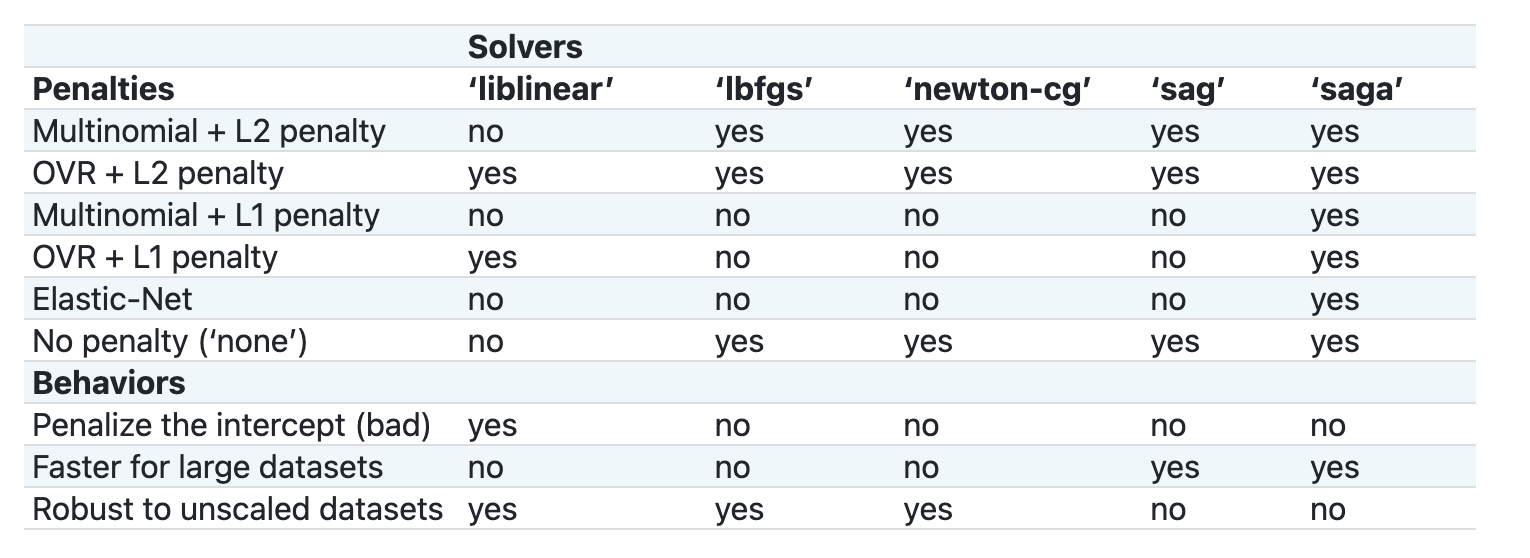

## Exercise - split the data
We can focus on logistic regression for our first training trial since you recently learned about the latter in a previous lesson. Split your data into training and testing groups by calling train_test_split():

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

## Exercise - apply logistic regression
Since you are using the multiclass case, you need to choose what scheme to use and what solver to set. Use LogisticRegression with a multiclass setting and the liblinear solver to train.

Create a logistic regression with multi_class set to ovr and the solver set to liblinear:

In [6]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.8123436196830692


The accuracy is good at over 80%!

✅ Try a different solver like lbfgs, which is often set as default

Note, use Pandas ravel function to flatten your data when needed.



In [7]:
lr = LogisticRegression(multi_class='ovr',solver='lbfgs')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.8123436196830692


The accuracy remains thesame even when the solver is changed from 'liblinear' to 'lbfgs'

You can see this model in action by testing one row of data (#50):

In [8]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['pork', 'scallion', 'sesame_oil', 'soy_sauce', 'wheat'], dtype='object')
cuisine: chinese


✅ Try a different row number and check the results

In [9]:
print(f'ingredients: {X_test.iloc[100][X_test.iloc[100]!=0].keys()}')
print(f'cuisine: {y_test.iloc[100]}')

ingredients: Index(['avocado', 'crab', 'lemon_juice', 'soy_sauce', 'wasabi'], dtype='object')
cuisine: japanese


Digging deeper, you can check for the accuracy of this prediction:

In [12]:
test= X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

c:\Users\This Pc\Desktop\Arewa Datascience\ArewaDS-Machine-Learning-Assignments\ADS_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
chinese,0.849579
korean,0.112074
thai,0.019355
japanese,0.017909
indian,0.001083


The result is printed - Chinese cuisine is its best guess, with good probability.

Get more detail by printing a classification report, as you did in the regression lessons:

In [11]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.78      0.67      0.72       243
      indian       0.93      0.89      0.91       269
    japanese       0.73      0.80      0.76       224
      korean       0.84      0.82      0.83       232
        thai       0.78      0.88      0.83       231

    accuracy                           0.81      1199
   macro avg       0.81      0.81      0.81      1199
weighted avg       0.82      0.81      0.81      1199

